# Different Noise Models

In [15]:
import numpy as np
from qiskit.circuit.library import TwoLocal
from qiskit.utils import algorithm_globals
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import BackendEstimator
import matplotlib.pyplot as plt 
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeNairobi, FakeGuadalupeV2, FakeGuadalupe

In [16]:
# create some parametrized circuit and observable
algorithm_globals.random_seed = 50
num_qubits = 3
ansatz = TwoLocal(num_qubits=num_qubits, rotation_blocks="ry", entanglement_blocks="cz")

op = SparsePauliOp.from_list(
    [
        ("III", 0.5),
        ("IIZ", -0.5)
    ]
)

# Exact results

In [17]:
from qiskit.primitives import Estimator
estimator = Estimator()

In [18]:
ntest = 10
num_parameters = ansatz.num_parameters
parameters = np.random.rand(ntest, num_parameters)

In [19]:
job = estimator.run(
    [ansatz]*ntest,
    [op]*ntest,
    parameters,
    shots = None
)
exact_values = job.result().values

# Aer Noise Model

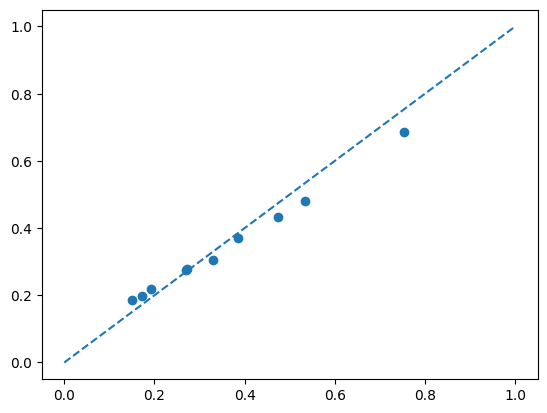

In [20]:
device = FakeGuadalupe()
seed = 170
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
estimator_fake = AerEstimator(
    backend_options={
        "method": "density_matrix",
        "coupling_map": coupling_map,
        "noise_model": noise_model,
    },
    run_options={"seed": seed, "shots": 10000},
    transpile_options={"seed_transpiler": seed},
)

job = estimator_fake.run(
    [ansatz]*ntest,
    [op]*ntest,
    parameters,
    shots = 10000
)

fake_values = job.result().values

plt.scatter(exact_values,fake_values)
plt.plot([0,1],[0,1],'--')

## Backend Estimator

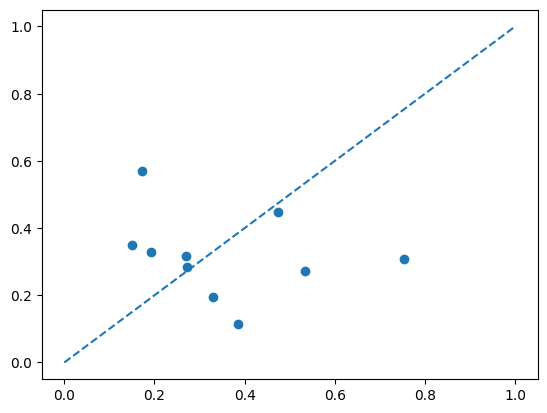

In [21]:
estimator_fake_2 = BackendEstimator(device)

job = estimator_fake_2.run(
    [ansatz]*ntest,
    [op]*ntest,
    parameters,
    shots = 10000
)

fake_values_2 = job.result().values

plt.scatter(exact_values,fake_values_2)
plt.plot([0,1],[0,1],'--')